# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import numpy as np

In [2]:
df = pd.read_csv("D:\Tasha's docs\поиски работы\__портфолио\wildberries_parcing_260122.csv", sep=";", dtype= {'vendor_id': 'str', 'seller INN': 'str', 'Seller OGRN': 'str'}, low_memory=False)

# EDA

In [3]:
df.head()

,Источник,vendor_id,name,seller,seller INN,Seller OGRN,sold out,price,category,brand,...,Количество ламп,Степень пылевлагозащиты,Вид гирлянды,Тип гирлянды,Цвет ламп,Уход за вещами,Фактура материала,Пол,Наполнитель,Тип декоративной подушки
0,https://www.wildberries.ru/catalog/49878488/de...,49878488,Textilena / Штора интерьерная «Зигзаг» для да...,"ООО \""Текстиль Лена\""",3706027602,1193702019224,NaN,888,Дом;Гостиная;Шторы;Textilena,Textilena,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.wildberries.ru/catalog/14721840/de...,14721840,"Регион Текстиль / Штора для кухни ""Ника""",РЕГИОН ТЕКСТИЛЬ ООО,5257067260,1045207148359,NaN,540,Дом;Гостиная;Шторы;Регион Текстиль,Регион Текстиль,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.wildberries.ru/catalog/35087202/de...,35087202,Шторы Новые / Гардина,Дегтева Марина Анатольевна ИП,634000015313,317774600580190,NaN,640,Дом;Гостиная;Шторы;Шторы Новые,Шторы Новые,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.wildberries.ru/catalog/44872345/de...,44872345,Witerra / Гардины,ВИТЕРРА ООО,5404428672,1115476002795,NaN,1347,Дом;Гостиная;Шторы;Witerra,Witerra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.wildberries.ru/catalog/49194691/de...,49194691,DANILIZ / Гардины шторы и портьеры / шторы дл...,ИП Лазаревич Любовь Владимировна,790825679,NaN,NaN,1285,Дом;Гостиная;Шторы;DANILIZ,DANILIZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217571 entries, 0 to 217570
Data columns (total 63 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Источник                         217571 non-null  object
 1   vendor_id                        217571 non-null  object
 2   name                             217571 non-null  object
 3   seller                           217566 non-null  object
 4   seller INN                       217276 non-null  object
 5   Seller OGRN                      214783 non-null  object
 6   sold out                         96 non-null      object
 7   price                            217571 non-null  int64 
 8   category                         217571 non-null  object
 9   brand                            217571 non-null  object
 10  date                             217571 non-null  object
 11  retailer                         217571 non-null  object
 12  shop            

In [5]:
df.describe()

,price
count,217571.000000
mean,2898.710131
std,1506.050972
min,0.000000
25%,2090.000000
50%,2776.000000
75%,3331.000000
max,39600.000000


In [6]:
df = df[df['price']!=0] # удаляем записи с нулевой ценой

In [7]:
df.describe()

,price
count,217475.000000
mean,2899.989709
std,1505.151156
min,45.000000
25%,2090.000000
50%,2776.000000
75%,3337.500000
max,39600.000000


# Категории товаров

In [8]:
df.groupby('category')['vendor_id'].nunique().sort_values(ascending=False)

category
Дом;Гостиная;Шторы;JoyArty         118799
Дом;Гостиная;Шторы;LeJoy             6218
Дом;Гостиная;Шторы;TomDom            4325
Дом;Гостиная;Шторы;Камея             3543
Дом;Гостиная;Шторы;quup              3289
                                    ...  
Дом;Гостиная;Шторы;Чистоня              1
Дом;Гостиная;Шторы;Цветущий сад         1
Дом;Гостиная;Шторы;S-Khan               1
Дом;Гостиная;Шторы;Хозяйка              1
Дом;Гостиная;Шторы;VIKONTEX             1
Name: vendor_id, Length: 1846, dtype: int64

In [111]:
empty_values = ('', None, np.NaN)

def condition_cat(row):
    name = row['name'].lower()
    if ('фото' in name):
        return 'Портьеры'
    elif ('держатель' in name or 'направляющ' in name or 'штанга' in name or 'кронштейн' in name or 'колец для карниза' in name
       or 'удлинитель' in name or 'колец' in name or 'кольц' in name or 'наконечник' in name 
        or 'заглуш' in name or 'фиксатор' in name or 'глайдер' in name
         or 'наконечник' in 'brand'):
        return 'Наборные карнизы'
    elif (row['Тип карниза'] not in empty_values
        or row['Особенности карниза'] not in empty_values
        or row['Назначение карниза'] not in empty_values):
        return 'Готовые карнизы'
    elif ('рулон' in name or 'ролл' in name or 'ролет' in name) and not 'не рулон' in name:
        return 'Рулонные шторы'
    elif ('римск' in name and 'штор' in name) and not 'лента' in name:
        return 'Римские шторы'
    elif ('жалюзи' in name or 'ламел' in name):
        return 'Жалюзи'
    elif (('штор' in name or 'портьер' in name or 'тюл' in name or 'гардин' in name or 'шотор' in name or 'вуаль' in name 
           or 'шора' in name or 'занавеска' in name or 'комплект' in name or 'ламбрекен' in name)
              and not ('рулон' in name or 'ролло' in name or 'карниз' in name or 'римск' in name or 'жалюз' in name)):
        return 'Портьеры'
    elif ('карниз' in name):
        return 'Готовые карнизы'
    else:
        return 'Аксессуары для штор'

df['категория'] = df.apply(condition_cat, axis=1)

In [112]:
df.groupby('категория')['vendor_id'].nunique().sort_values(ascending=False)

категория
Портьеры               202800
Рулонные шторы           8575
Наборные карнизы         2577
Аксессуары для штор      2133
Готовые карнизы          1150
Римские шторы             229
Жалюзи                     11
Name: vendor_id, dtype: int64

In [11]:
pd.set_option("display.max_columns", None)

In [14]:
import IPython.display

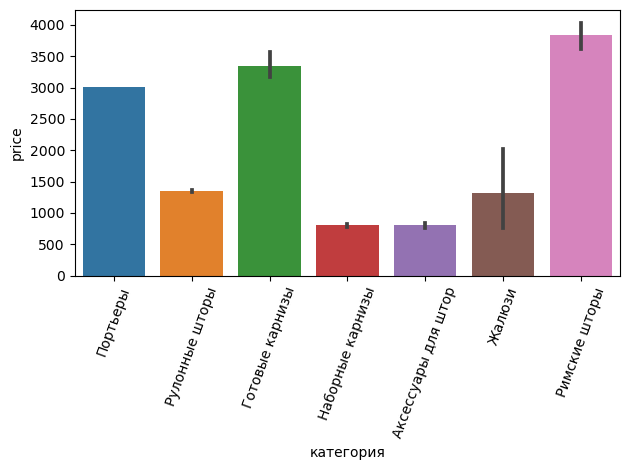

In [15]:
sns.barplot(df, x='категория', y='price')
plt.xticks(rotation=70)
plt.tight_layout()

In [ ]:
IPython.display.HTML(df.loc[(df['категория']=='Аксессуары для штор') & (df['name'].str.contains('одхват') == False)].to_html())


,Источник,vendor_id,name,seller,seller INN,Seller OGRN,sold out,price,category,brand,date,retailer,shop,Материал изделия,Вес с упаковкой (кг),Высота предмета,Высота упаковки,Высота штор,Глубина упаковки,Назначение штор,Плотность ткани,Рисунок,Ширина предмета,Ширина упаковки,Ширина штор,Страна производства,Комплектация,Декоративные элементы,Комната назначения,Длина предмета,Конструкция,Назначение карниза,Тип запчасти карниза,Тип карниза,Диаметр предмета,Особенности карниза,Количество предметов в упаковке,Ограничение,Вес товара с упаковкой (г),Тип крепления,Хрупкость,Глубина предмета,Тип штор,Вес товара без упаковки (г),Количество рядов кронштейна,Назначение подарка,Повод,Диаметр (мм),Вид творчества,Виды штор,Сезон,Назначение,Особенности материала,Количество ламп,Степень пылевлагозащиты,Вид гирлянды,Тип гирлянды,Цвет ламп,Уход за вещами,Фактура материала,Пол,Наполнитель,Тип декоративной подушки,категория
649,https://www.wildberries.ru/catalog/54776662/de...,54776662,VSD/Блэкаут на окна в гостиную спальню 150х270...,ИП ДАТИН ВАСИЛИЙ СЕРГЕЕВИЧ,561208145979,321508100194353,NaN,2649,Дом;Гостиная;Шторы;VSD/Блэкаут на окна в гости...,VSD/Блэкаут на окна в гостиную спальню 150х270 см,26.01.22,Wildberries,Москва,плотные блэкаут затемняющие классические тюлев...,NaN,NaN,NaN,270 &#x2B;- 5 см; 270 см высота шторы; 270 см.,NaN,в зал в комнату на дверь в детскую балконные; ...,NaN,Однотонные стильные без рисунка,NaN,NaN,150 * 2шт; 150 см ширина шторы; 150 см * 2 шт,Россия,комплект штор 300 на 270 см,шторная лента,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Портьеры
654,https://www.wildberries.ru/catalog/54788624/de...,54788624,VSD/Блэкаут на окна в гостиную спальню 150х270...,ИП ДАТИН ВАСИЛИЙ СЕРГЕЕВИЧ,561208145979,321508100194353,NaN,2649,Дом;Гостиная;Шторы;VSD/Блэкаут на окна в гости...,VSD/Блэкаут на окна в гостиную спальню 150х270 см,26.01.22,Wildberries,Москва,плотные блэкаут затемняющие классические тюлев...,NaN,NaN,NaN,270 &#x2B;- 5 см; 270 см высота шторы; 270 см.,NaN,в зал в комнату на дверь в детскую балконные; ...,NaN,Однотонные стильные без рисунка,NaN,NaN,150 * 2шт; 150 см ширина шторы; 150 см * 2 шт,Россия,комплект штор 300 на 270 см,шторная лента,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Портьеры
658,https://www.wildberries.ru/catalog/54786264/de...,54786264,VSD/Блэкаут на окна в гостиную спальню 150х270...,ИП ДАТИН ВАСИЛИЙ СЕРГЕЕВИЧ,561208145979,321508100194353,NaN,2649,Дом;Гостиная;Шторы;VSD/Блэкаут на окна в гости...,VSD/Блэкаут на окна в гостиную спальню 150х270 см,26.01.22,Wildberries,Москва,плотные блэкаут затемняющие классические тюлев...,NaN,NaN,NaN,270 &#x2B;- 5 см; 270 см высота шторы; 270 см.,NaN,в зал в комнату на дверь в детскую балконные; ...,NaN,Однотонные стильные без рисунка,NaN,NaN,150 * 2шт; 150 см ширина шторы; 150 см * 2 шт,Россия,комплект штор 300 на 270 см,шторная лента,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Портьеры
659,https://www.wildberries.ru/catalog/54788078/de...,54788078,VSD/Блэкаут на окна в гостиную спальню 150х270...,ИП ДАТИН ВАСИЛИЙ СЕРГЕЕВИЧ,561208145979,321508100194353,NaN,2649,Дом;Гостиная;Шторы;VSD/Блэкаут на окна в гости...,VSD/Блэкаут на окна в гостиную спальню 150х270 см,26.01.22,Wildberries,Москва,плотные блэкаут затемняющие классические тюлев...,NaN,NaN,NaN,270 &#x2B;- 5 см; 270 см высота шторы; 270 см.,NaN,в зал в комнату на дверь в детскую балконные; ...,NaN,Однотонные стильные без рисунка,NaN,NaN,150 * 2шт; 150 см ширина шторы; 150 см * 2 шт,Россия,комплект штор 300 на 270 см,шторная лента,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Портьеры
662,https://www.wildberries.ru/catalog/54787309/de...,54

# Бренды

In [16]:
df.groupby(['brand', 'категория'])['vendor_id'].nunique().sort_values(ascending=False)

brand                                           категория    
JoyArty                                         Портьеры         118799
LeJoy                                           Портьеры           6218
TomDom                                          Портьеры           4426
Камея                                           Портьеры           3543
quup                                            Портьеры           3289
                                                                  ...  
COMFORT IN MY HOUSE                             Портьеры              1
Нанотекстиль/Штора портьера блэкаут 295х273 см  Портьеры              1
Нанотекстиль/Тюль лен на люверсах 268х273 см    Портьеры              1
Нанотекстиль/ Портьеры блэкаут 2 шт 590х290 см  Портьеры              1
ГАЛАНТ                                          Римские шторы         1
Name: vendor_id, Length: 1983, dtype: int64

In [54]:
df.pivot_table(index = 'brand', values=['vendor_id'], columns = 'категория', aggfunc='count', fill_value = 0, margins=True)

vendor_id                         \
категория           Аксессуары для штор Готовые карнизы Жалюзи   
brand                                                            
01-ДОМОК                              0              14      0   
0market                               0               0      0   
1 ANF                                 0               0      0   
1.Decoracion Textil                   0               0      0   
1000 Каталог                          1               0      0   
...                                 ...             ...    ...   
форос                                 0               0      0   
центр штор                            0               0      0   
шторы блэкаут                         0               0      0   
шторы блэкаут SQ                      0               0      0   
All                                2133            1150     11   

                                                                            \
категория           Наборные карнизы Портьеры Римские шторы Рулонные шторы   
brand                                                                        
01-ДОМОК                           8        0             0              0   
0market                           14        6             0              0   
1 ANF                              0       21             0              0   
1.Decoracion Textil                0       16             0              0   
1000 Каталог                       0       35             0              0   
...                              ...      ...           ...            ...   
форос                              0        0             0              1   
центр штор                         0       13             0              0   
шторы блэкаут                      0        3             0              0   
шторы блэкаут SQ                   0        9             0              0   
All                             2577   202800           229           8575   

                             
категория               All  
brand                        
01-ДОМОК                 22  
0market                  20  
1 ANF                    21  
1.Decoracion Textil      16  
1000 Каталог             36  
...                     ...  
форос                     1  
центр штор               13  
шторы блэкаут             3  
шторы блэкаут SQ          9  
All                  217475  

[1666 rows x 8 columns]

In [57]:
cat_brands = df.pivot_table(index = 'brand', values=['vendor_id'], columns = 'категория', aggfunc='count', fill_value = 0, margins=True).iloc[:-1]

In [64]:
cat_brands.sort_values(by=('vendor_id', 'All'), ascending=False)

vendor_id                         \
категория           Аксессуары для штор Готовые карнизы Жалюзи   
brand                                                            
JoyArty                               0               0      0   
LeJoy                                 0               0      0   
TomDom                                0               0      0   
Камея                                 0               0      0   
quup                                  0               0      0   
...                                 ...             ...    ...   
ПЕРВЫЙ ДОМ ТЕКСТИЛЯ                   0               0      0   
zaure                                 0               0      0   
Alshana                               0               0      0   
Citilux                               1               0      0   
Hitachi Nuclear                       0               0      0   

                                                                            \
категория           Наборные карнизы Портьеры Римские шторы Рулонные шторы   
brand                                                                        
JoyArty                            0   118799             0              0   
LeJoy                              0     6218             0              0   
TomDom                             0     4426             0              1   
Камея                              0     3543             0              0   
quup                               0     3289             0              0   
...                              ...      ...           ...            ...   
ПЕРВЫЙ ДОМ ТЕКСТИЛЯ                0        1             0              0   
zaure                              0        1             0              0   
Alshana                            0        1             0              0   
Citilux                            0        0             0              0   
Hitachi Nuclear                    1        0             0              0   

                             
категория               All  
brand                        
JoyArty              118799  
LeJoy                  6218  
TomDom                 4427  
Камея                  3543  
quup                   3289  
...                     ...  
ПЕРВЫЙ ДОМ ТЕКСТИЛЯ       1  
zaure                     1  
Alshana                   1  
Citilux                   1  
Hitachi Nuclear           1  

[1665 rows x 8 columns]

In [79]:
cat_brands_wo_curtains = df[df['категория']!='Портьеры'].pivot_table(index = 'brand', values=['vendor_id'], columns = 'категория', aggfunc='count', fill_value = 0, margins=True).iloc[:-1]

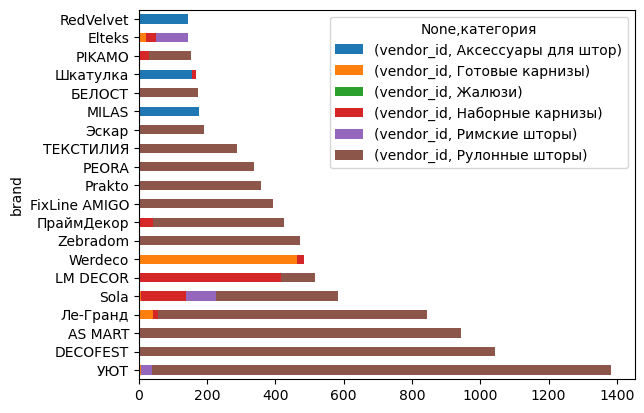

In [95]:
cat_br = cat_brands_wo_curtains.iloc[:, :-1].head(20).plot(kind = 'barh', stacked = True)

In [134]:
cat_brands_prices = df.pivot_table(index = ['категория', 'brand'], values=['vendor_id', 'price'], aggfunc={'vendor_id': 'count', 'price': np.median}, fill_value = 0, margins=True).sort_values(by=['категория', 'vendor_id'], ascending=False)

In [135]:
IPython.display.HTML(cat_brands_prices.to_html())